In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
import time
from scipy import fft
from scipy import signal

In [10]:
# path = r"D:\study\moed2\3lab\p1.jpg"
# path = r"D:\study\moed2\3lab\p2.jpg"
# path = r"D:\study\moed2\3lab\p3.jpg"
# path = r"D:\study\moed2\3lab\p4.jpg"
# path = r"D:\study\moed2\3lab\p5.jpg"
# path = r'D:\study\moed2\1lab\grace.jpg'
path = r"D:\study\moed2\2lab\c12-85v.png"
# path = r"D:\study\moed2\2lab\u0_0.6.png"

img = cv.imread(path)
print(img.shape)
img = img[:,:,2]
print(img.shape)

(1024, 1024, 3)
(1024, 1024)


In [3]:
def show_picture_plot(image, title: str='window_name'):
    try:
        plt.figure(figsize=(10,10))
        plt.title(title)
        plt.imshow(image, cmap='gray')
    except Exception :
        # cv.destroyAllWindows()
        print('error')

In [4]:
def show_picture(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        cv.waitKey(0)
        cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

def show_picture_not_close(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        # cv.waitKey(0)
        # cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

def inverse_image(image):
    if len(image.shape)==2:
        # start_time = time.time()
        image=np.array(image)
        x_len, y_len = image.shape[0], image.shape[1]
        vmax = np.max(image)

        new_image = vmax - (1) - image

        result = np.array(new_image)
        return result

In [5]:
def gray_image(image):
    mx = np.max(image)
    mn = np.min(image)
    amp = mx-mn
    img_restore_shift = (((image-mn)/amp)*255).astype('int')
    return img_restore_shift

In [6]:
def build_histogram(image):
    x_len, y_len = image.shape[0], image.shape[1]


    histogram = np.zeros(256)
    print(histogram.shape)
    for i in range(x_len):
        for e in range(y_len):
            histogram[image[i,e]]+=1
    mx = np.max(histogram)
    histogram = (histogram/mx)*255
    return histogram

def build_cdf(histogram):
    cdf = np.zeros(256)
    cdf[0] = histogram[0]
    for i in range(1, histogram.shape[0]):
        cdf[i]+=cdf[i-1]+histogram[i]
    mx = np.max(cdf)
    cdf = (cdf/mx)*255
    return cdf

In [7]:
def fourier_transform_1d(image_vector, dt=None):
    # start_time = time.time()
    N = len(image_vector)
    if dt:
        # dt = 1
        fgr = 1. / (dt * 2)
        print(fgr)
        df = (2. * fgr) / N
        print(df)
        data_new = image_vector.copy()[:int(fgr / df)]
        data_x_new = df * np.array(range(int(fgr / df)))
        gr = int(fgr / df)

        data_np = np.array(image_vector)
    else:
        data_new = np.zeros(N//2)
        data_x_new = np.array(range(N // 2))
        gr = N//2
        data_np = np.array(image_vector)

    '''Спектр высчитывается вручную'''
    for n in range(gr):
        re = 0
        im = 0
        for k in range(N):
            re += image_vector[k] * math.cos((2 * math.pi * n * k) / N)
            im += image_vector[k] * math.sin((2 * math.pi * n * k) / N)
        '''Оптимизированный способ'''
        # imre = np.sum(data_np*np.exp(2*(-1j)*np.pi*n*np.arange(N)/N))
        data_new[n] = math.sqrt(re ** 2 + im ** 2)
    # print('elapsed', time.time() - start_time)
    return data_new

def fourier_transform_1d_back(vector, dt=None):
    N = len(vector)
    if dt:
        # dt = 1
        fgr = int(1 / (dt * 2))
        print(fgr)
        df = (2 * fgr) / N
        print(df)
        data_new = vector.copy()[:int(fgr / df)]
        data_x_new = df * np.array(range(int(fgr / df)))
        gr = int(fgr / df)

        data_np = np.array(vector)
    else:
        data_new = np.zeros(N//2)
        data_x_new = np.array(range(N // 2))
        gr = N//2
        data_np = np.array(vector)

    '''Спектр высчитывается вручную'''
    for n in range(gr):
        # re = 0
        # im = 0
        # for k in range(N):
        #     re += image_vector[k] * math.cos((2 * math.pi * n * k) / N)
        #     im += image_vector[k] * math.sin((2 * math.pi * n * k) / N)
        '''Оптимизированный способ'''
        re = np.sum(data_np * np.cos((2 * math.pi * n * np.arange(N)) / N))
        im = np.sum(data_np * np.sin((2 * math.pi * n * np.arange(N)) / N))
        re /= N
        im /= N
        data_new[n] = re + im
    # print('elapsed', time.time() - start_time)
    return data_new

def diff_func(vector, dt=None):
    N = len(vector)
    diff = np.zeros(N)

    for i in range(N-1):
        if vector[i]==0:
            diff[i]=0
            continue
        if dt:
            diff[i] = (vector[i+1]-vector[i])/dt
        else:
            diff[i] = (vector[i+1]-vector[i])
    return diff

def show_plot(func, x=None,  title = 'title'):
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.grid()
    if x is not None:
        plt.plot(x, func)
    else:
        plt.plot(func)

def show_plots(funcs, x=None,  title = 'title'):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    plt.title(title)
    plt.grid()
    for i in range(len(funcs)):
        if x is not None:
            ax.plot(x, funcs[i])
        else:
            ax.plot(funcs[i])

def gamma_transform_image(image, C: float, gamma: float):
    # try:
    # print('here')
    new_image = []
    if len(image.shape)==2:
        # start_time = time.time()
        image=np.array(image)
        x_len, y_len = image.shape[0], image.shape[1]
        # print(image[:10])
        new_image = C * (image ** gamma)
        # print(new_image[:10])

        result = np.array(new_image)
        # result = np.array(new_image)
        # print('time', time.time()-start_time)
        # print('orig shape', result.shape)
        return result

    # except Exception:
    #     cv.destroyAllWindows()
    #     print('error')

def autocorrelation_vector(vector):
    n = vector.shape[0]
    av = np.average(vector)
    vector_av = vector-av
    new_vector = []
    for lp in range(n):
        sm = 0
        for i in range(n-lp-1):
            sm+=vector_av[i]*vector_av[i+lp]
        new_vector.append(sm/n)
    return np.array(new_vector)

def correlation_vector(vector, vector2):
    n = vector.shape[0]
    av = np.average(vector)
    av2 = np.average(vector2)
    vector_av = vector-av
    vector2_av = vector2-av2
    new_vector = []
    for lp in range(n):
        sm = 0
        for i in range(n-lp-1):
            sm+=vector_av[i]*vector2_av[i+lp]
        new_vector.append(sm/n)
    return np.array(new_vector)

def convolution(vector1, vector2):
    """
    Функция свёртки

    :param
    :return:
    """
    M = len(vector1)
    N = len(vector2)

    # data_new = np.zeros(N+M)
    #
    # for k in range(N+M):
    #     sm = 0
    #     for j in range(M):
    #         if k-j < 0:
    #             sm += func.data[k - j] * self.data[j]
    #             continue
    #         if k-j>=N:
    #             sm += func.data[(k - j)%N] * self.data[j]
    #             continue
    #         sm += func.data[(k - j) % N] * self.data[j]
    #     data_new[k] = sm
    #
    # data_new = data_new[M//2:-M//2]
    # data_x_new = np.array(range(N))

    '''с помощью библиотеки'''
    data_new = signal.convolve(vector1, vector2, mode='same')
    # data_new = np.convolve(self.data, func.data, mode='full')
    # data_x_new = np.arange(len(data_new))

    return data_new

def normilize(vector, vl=None):
    mx = vl
    if vl is None:
        mx = np.max(vector)
    vector/=mx
    return vector

def equalize(image, cdf):
    x_len, y_len = image.shape[0], image.shape[1]
    new_image = np.zeros((x_len, y_len))
    int_hist = np.array(cdf).astype('int')
    for i in range(x_len):
        for e in range(y_len):
            new_image[i,e] = int_hist[image[i,e]]

    return new_image

class Filter:
    """Цифровые фильтры частот"""

    @staticmethod
    def lpf(fc, dt, m) -> list:
        data = []
        m: int = m
        fc: float = fc
        dt: float = dt

        d = [0.35577019, 0.2436983, 0.07211497, 0.00630165]
        # rectangular part weights
        fact = 2 * fc * dt
        arg = fact * np.pi
        data = np.sin(arg * np.array(range(1, m + 1))) / np.array(np.array(range(1, m + 1)) * np.pi)
        data = list(data)
        data.insert(0, fact)

        # trapezoid smoothing in the end
        data[m] /= 2.
        #
        # # P310 smoothing window
        sumg = data[0]
        for i in range(1, m + 1):
            sum = d[0]
            arg = np.pi * i / m
            for k in range(1, 4):
                sum += 2. * d[k] * np.cos(arg * k)
            data[i] *= sum
            sumg += 2 * data[i]

        for i in range(m + 1):
            data[i] /= sumg

        sym_data = data[:0:-1]
        data = sym_data + data

        return data

    @staticmethod
    def hpf(fc, dt, m) -> list:
        data = []
        lpw = Filter.lpf(fc, dt, m)
        mmax = max(lpw)
        for i in range(2*m+1):
            val = 1.-lpw[i] if i == m else -lpw[i]
            data.append(val)

        return data

    @staticmethod
    def bpf(fc1, fc2, dt, m) -> list:
        data = []
        lpw1 = Filter.lpf(fc1, dt, m)
        lpw2 = Filter.lpf(fc2, dt, m)
        if fc1 >= fc2:
            raise Exception('fc1 must be less then fc2')
        for i in range(2 * m + 1):
            data.append(lpw2[i]-lpw1[i])

        return data

    @staticmethod
    def bsf(fc1, fc2, dt, m) -> list:
        data = []
        lpw1 = Filter.lpf(fc1, dt, m)
        lpw2 = Filter.lpf(fc2, dt, m)
        if fc1 >= fc2:
            raise Exception('fc1 must be less then fc2')
        for i in range(2 * m + 1):
            val = 1. + lpw1[i] - lpw2[i] if i == m else lpw1[i] - lpw2[i]
            data.append(val)

        return data

(1024, 1024)


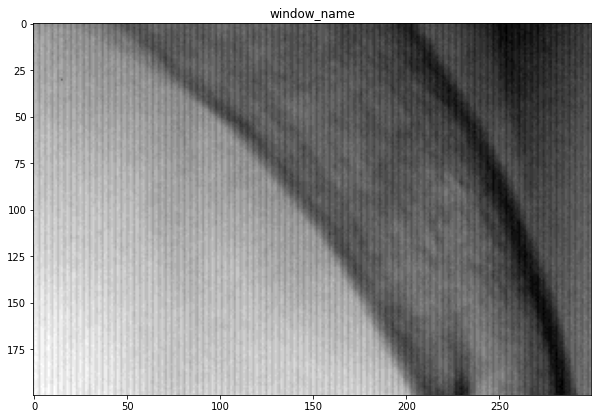

In [24]:
show_picture_plot(img[300:500,600:900])
cv.imwrite(path+'2.jpg',img[300:500,600:900])
print(img.shape)

(1024, 1024)
(512,)


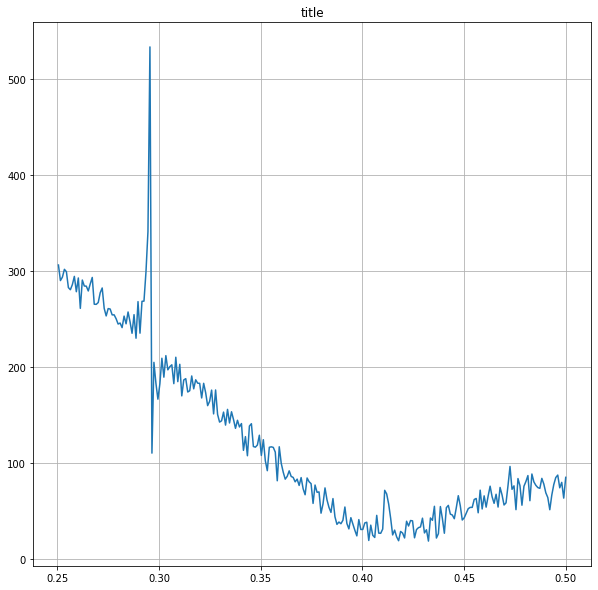

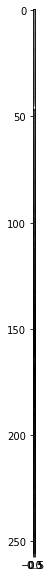

In [12]:
print(img.shape)
fourier_line = fourier_transform_1d(img[0])
print(fourier_line.shape)
l = fourier_line.shape[0]
x = np.linspace(0, 0.5, l)
show_plot(fourier_line[l//2:], x[l//2:])
image_line_f = fourier_line[l//2:, np.newaxis]
# print(np.max(image_line_f))
# print(np.min(image_line_f))
# print(np.mean(image_line_f))
# image_line_f = gamma_transform_image(image_line_f, 5, 0.5)
# print(np.max(image_line_f))
# print(np.min(image_line_f))
# print(np.mean(image_line_f))
# image_line_f = gray_image(image_line_f)
# print(np.max(image_line_f))
# print(np.min(image_line_f))
# print(np.mean(image_line_f))
show_picture_plot(image_line_f,'')

In [ ]:
lines=[]
# print(lines.shape)
for i in range(img.shape[1]//2):
    lines.append(fourier_transform_1d(img[i]))
    if i%100==0:
        print((i/(img.shape[1]//2))*100)

0.0
13.333333333333334


(750, 375)


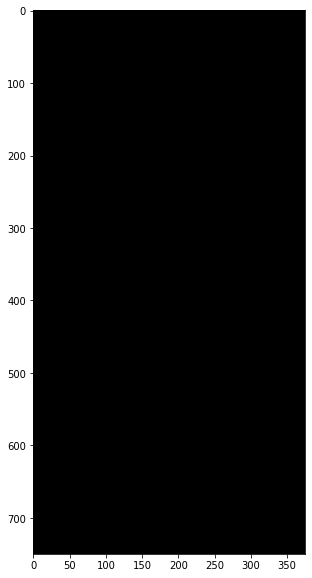

In [24]:
# lines = np.asarray(lines, float)
# lines = gray_image(lines)
# hist = build_histogram(lines)
# cdf = build_cdf(hist)
#
# lines2 = equalize(lines, cdf)

print(lines[:,l//2:].shape)
show_picture_plot(lines[:,l//2:],'')

ERROR! Session/line number was not unique in database. History logging moved to new session 1047


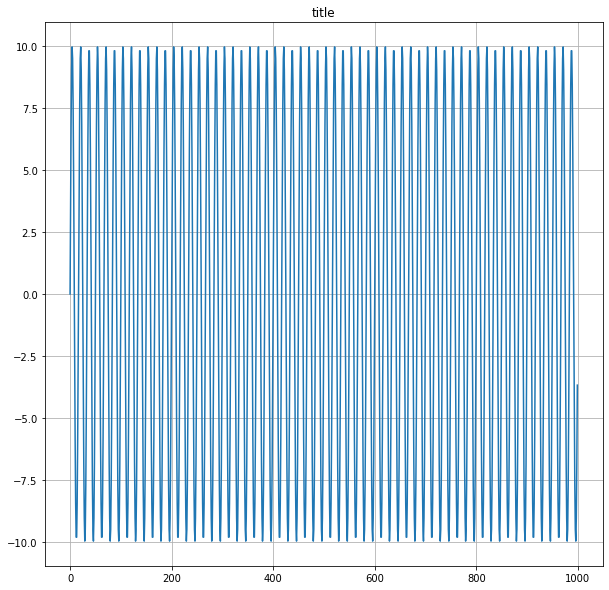

In [36]:
sn = 10 * np.sin(2 * np.pi * 30 * np.arange(1000) * 0.002)
show_plot(sn)

(1024,)


C:\Users\ACER\AppData\Local\Temp\ipykernel_19276\3258135619.py:80: RuntimeWarning: overflow encountered in ubyte_scalars
  diff[i] = (vector[i+1]-vector[i])


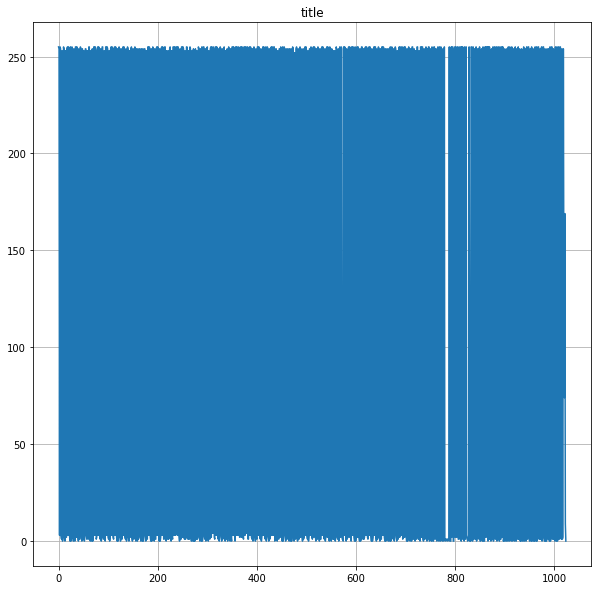

In [13]:
diff = diff_func(img[0])
print(diff.shape)

show_plot(diff)

(512,)


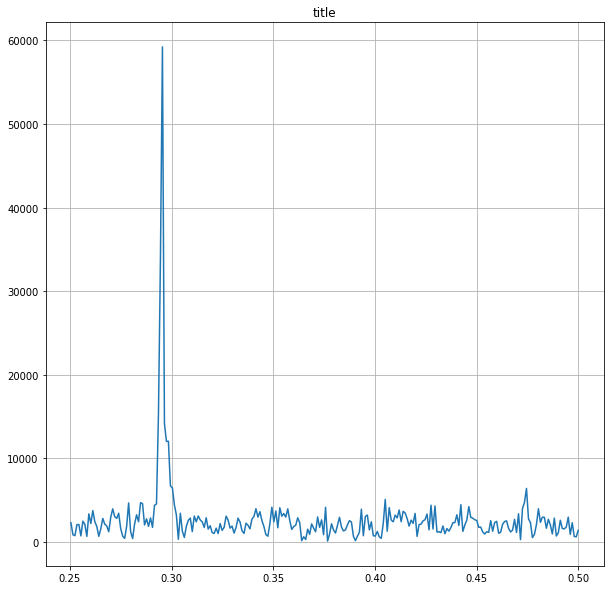

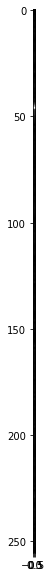

In [14]:
fourier_line = fourier_transform_1d(diff)
print(fourier_line.shape)
l = fourier_line.shape[0]
x = np.linspace(0, 0.5, l)
show_plot(fourier_line[l//2:], x[l//2:])
image_line_f = fourier_line[l//2:, np.newaxis]
# print(np.max(image_line_f))
# print(np.min(image_line_f))
# print(np.mean(image_line_f))
# image_line_f = gamma_transform_image(image_line_f, 5, 0.5)
# print(np.max(image_line_f))
# print(np.min(image_line_f))
# print(np.mean(image_line_f))
# image_line_f = gray_image(image_line_f)
# print(np.max(image_line_f))
# print(np.min(image_line_f))
# print(np.mean(image_line_f))
show_picture_plot(image_line_f,'')

In [114]:
lines_dif=[]
# print(lines.shape)
for i in range(img.shape[1]//2):
    dif_line = diff_func(img[i])
    lines_dif.append(fourier_transform_1d(dif_line))
    if i%100==0:
        print((i/(img.shape[1]//2))*100)

C:\Users\ACER\AppData\Local\Temp\ipykernel_11612\1952210597.py:83: RuntimeWarning: overflow encountered in ubyte_scalars
  diff[i] = (vector[i+1]-vector[i])


0.0
13.333333333333334
26.666666666666668
40.0
53.333333333333336
66.66666666666666
80.0
93.33333333333333


(750, 1)


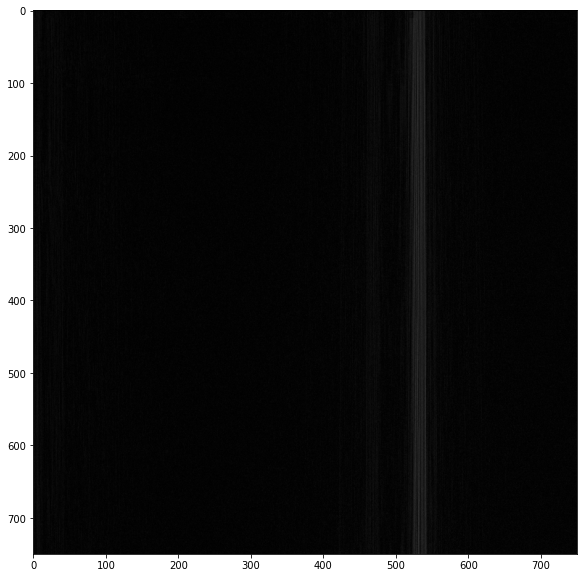

In [115]:
lines_dif = np.array(lines_dif)
print(lines_dif[:,l//2:].shape)
show_picture_plot(lines_dif[:,:],'')

(1024,)
(512,)


C:\Users\ACER\AppData\Local\Temp\ipykernel_19276\3258135619.py:80: RuntimeWarning: overflow encountered in ubyte_scalars
  diff[i] = (vector[i+1]-vector[i])


(512,)
(512,)
(512,)


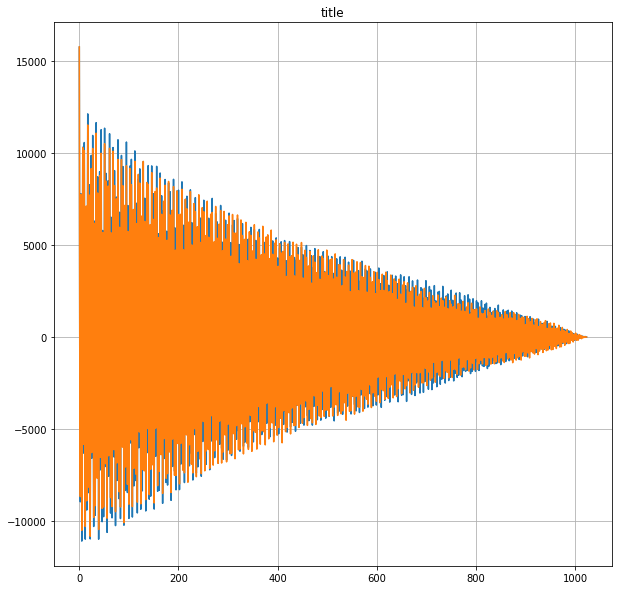

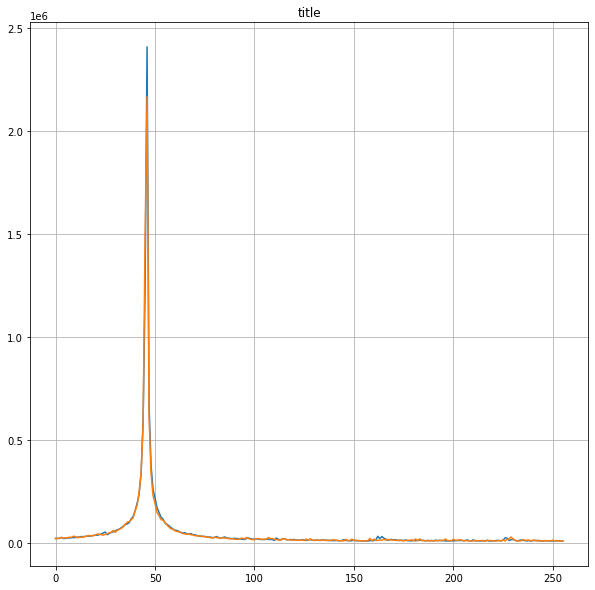

In [15]:
print(diff.shape)
ds = 400
diff = diff_func(img[ds])
diff2 = diff_func(img[0])
l = diff.shape[0]
print(diff[l//2:].shape)

akf = autocorrelation_vector(diff)
akf2 = autocorrelation_vector(diff2)

# akf = np.correlate(diff, diff, mode='same')
# akf2 = np.correlate(diff2, diff2, mode='same')

show_plots([akf, akf2])

akf_f = fourier_transform_1d(akf)
akf_f2 = fourier_transform_1d(akf2)
print(akf_f.shape)
print(akf_f2.shape)
l = akf_f.shape[0]
x = np.linspace(0, 0.5, l)

print(akf_f.shape)
show_plots([akf_f[l//2:], akf_f2[l//2:]])

(1024,)
(512,)


C:\Users\ACER\AppData\Local\Temp\ipykernel_19276\3258135619.py:80: RuntimeWarning: overflow encountered in ubyte_scalars
  diff[i] = (vector[i+1]-vector[i])


(1024,)
(512,)


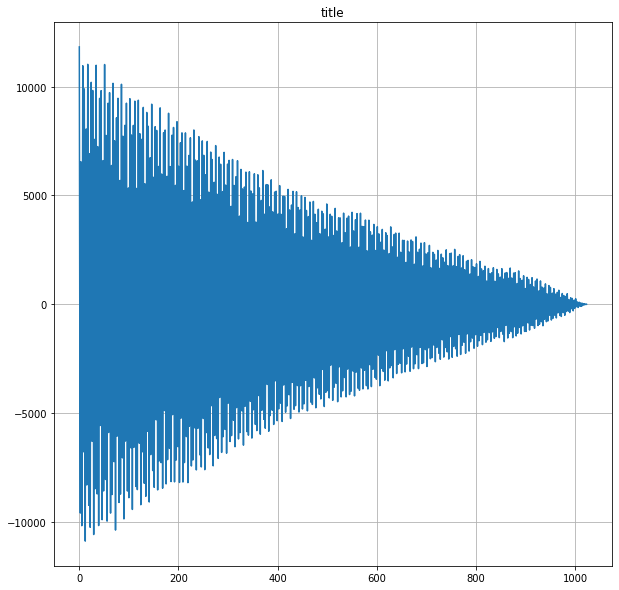

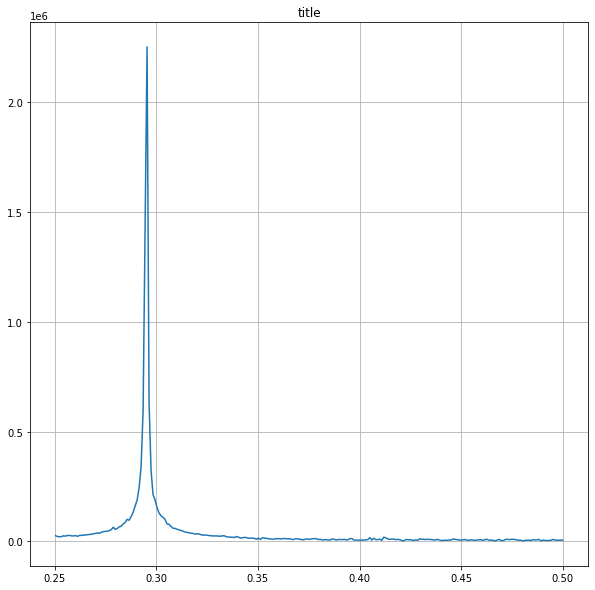

In [16]:
print(diff.shape)
st, ds = 0,100
diff = diff_func(img[st])
diff2 = diff_func(img[st+ds])
l = diff.shape[0]
print(diff[l//2:].shape)

# akf = autocorrelation_vector(diff)
vkf = correlation_vector(diff, diff2)
vkf_f = fourier_transform_1d(vkf)
print(vkf.shape)
l = vkf_f.shape[0]
x = np.linspace(0, 0.5, l)

print(vkf_f.shape)
show_plot(vkf)
show_plot(vkf_f[l//2:], x[l//2:])


0.5
0.015384615384615385
0.5
0.015384615384615385
32


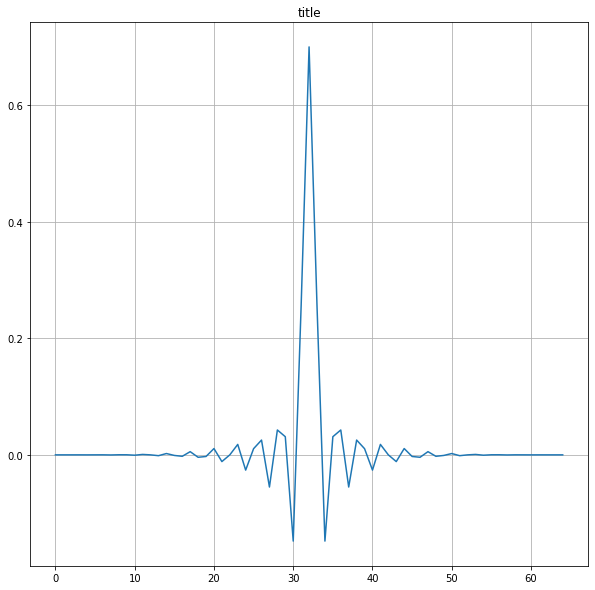

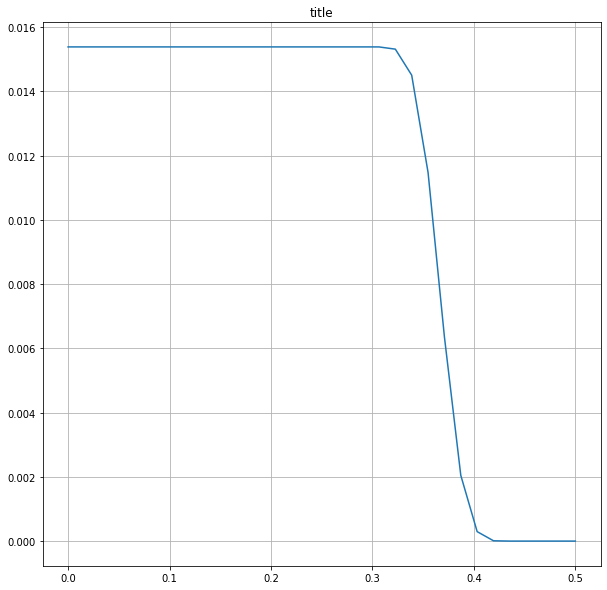

In [67]:
dt = 1
filter = Filter.lpf(0.35, dt, 32)

show_plot(filter)

filter_f = fourier_transform_1d(filter,dt)
fgr = 1. / (dt * 2)
print(fgr)
df = (2. * fgr) / len(filter)
print(df)
print(int(fgr / df))
data_x_new = df * np.array(range(int(fgr / df)))

# filter_f = fft.fft(filter)
# tmp_x = fft.fftfreq(len(filter_f), 0.001)
x = np.linspace(0, 0.5, len(filter_f))
# show_plot(filter_f, data_x_new)
show_plot(filter_f, x)

In [ ]:
vct1 = np.zeros(100)
vct1[30:70]=1

vct2 = np.zeros(100)
vct2[30:70]=1

cnv = convolution(vct1, vct2)

show_plot(cnv)

0.5
0.001


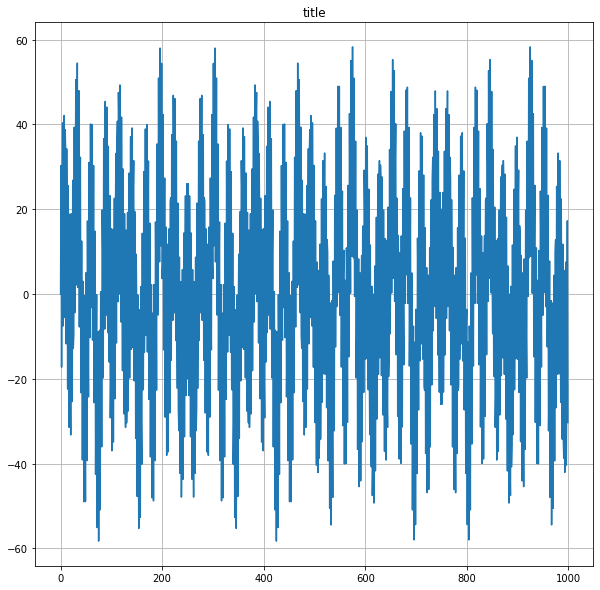

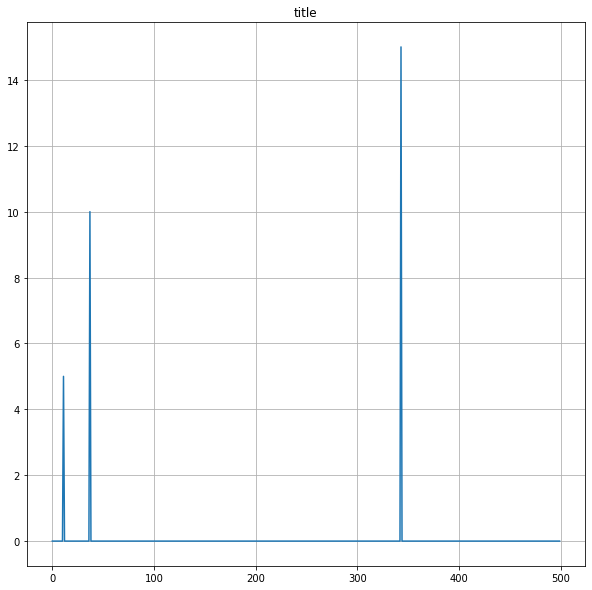

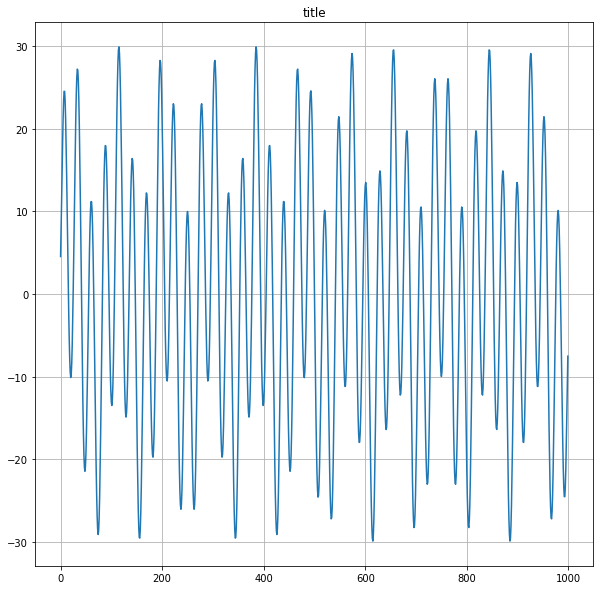

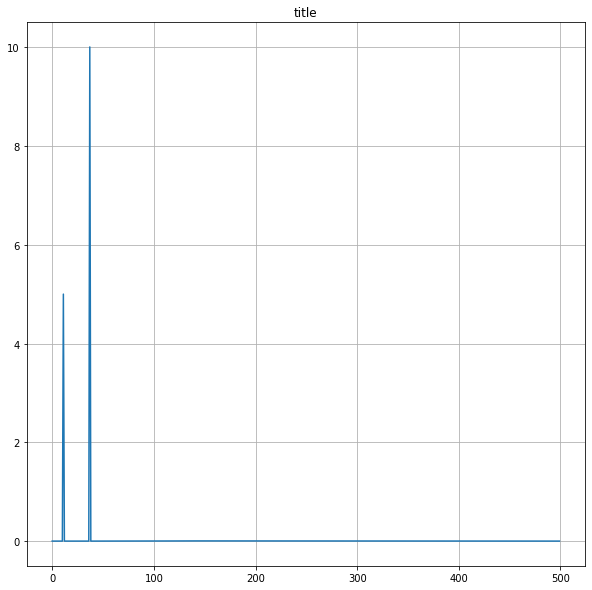

In [90]:
poly = []
n = 1000
a1 = 10
f1 = 0.011
a2 = 20
f2 = 0.037
a3 = 30
f3 = 0.343
dt = 1
value1 = a1 * np.sin(2 * np.pi * f1 * np.arange(n) * dt)
value2 = a2 * np.sin(2 * np.pi * f2 * np.arange(n) * dt)
value3 = a3 * np.sin(2 * np.pi * f3 * np.arange(n) * dt)
# for i in range(n):
#     value1 = a1 * np.sin(2 * np.pi * f1 * i * dt)
#     value2 = a2 * np.sin(2 * np.pi * f2 * i * dt)
#     value3 = a3 * np.sin(2 * np.pi * f3 * i * dt)
#     poly.append(value1 + value2 + value3)
poly = value1+value2+value3

poly_f = fourier_transform_1d(poly, dt)
filter = Filter.lpf(0.1, dt, 32)
conv = convolution(poly, filter)
conv_f = fourier_transform_1d(conv)

show_plot(poly)
show_plot(poly_f)
show_plot(conv)
show_plot(conv_f)

0.5
0.007751937984496124


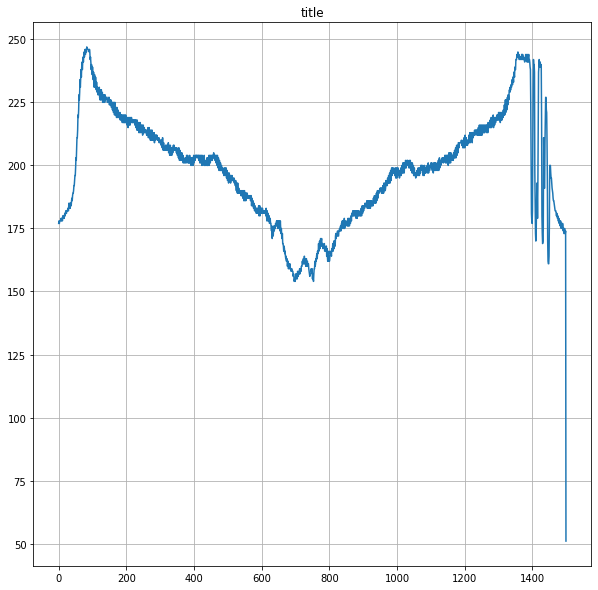

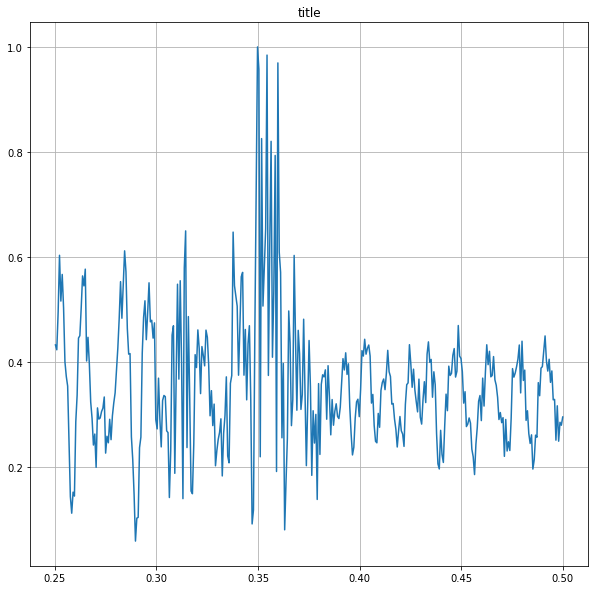

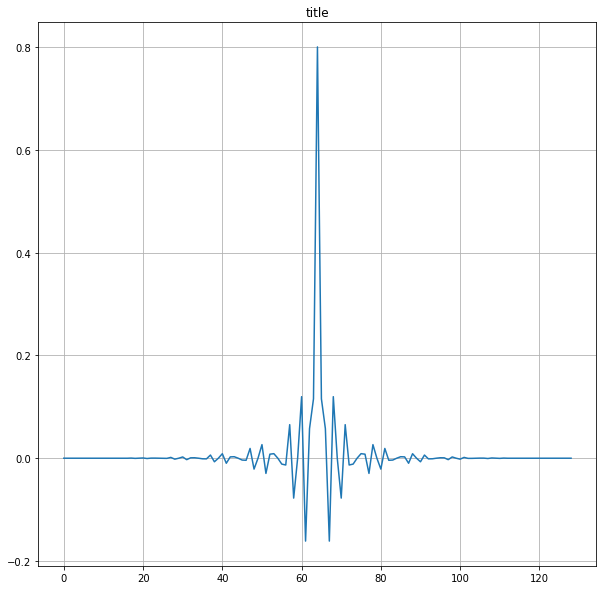

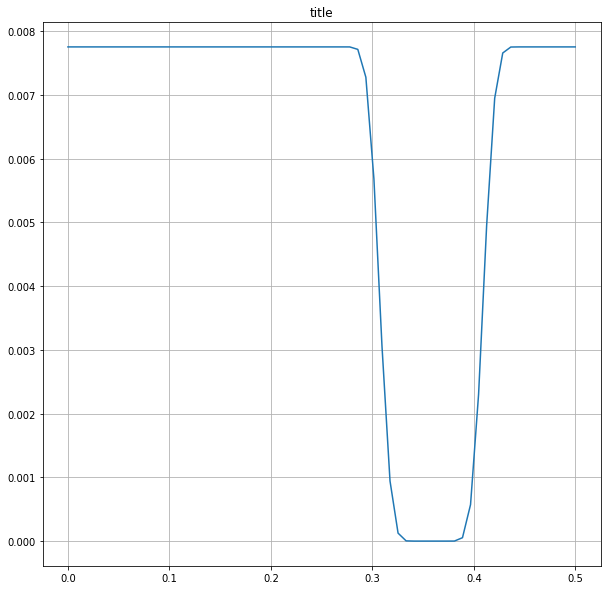

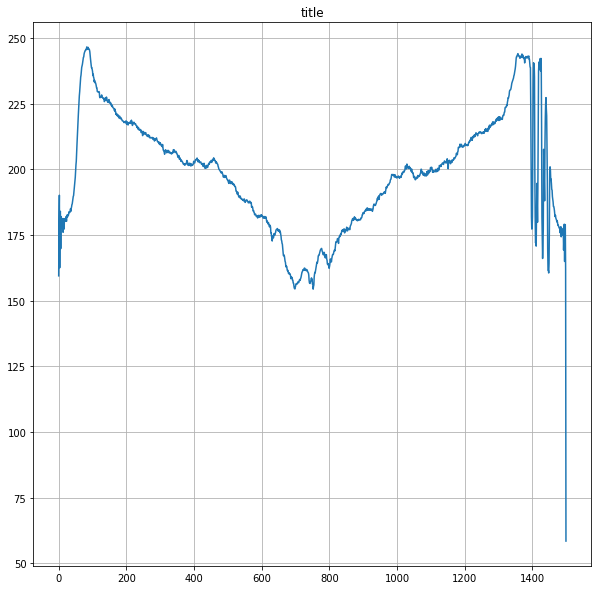

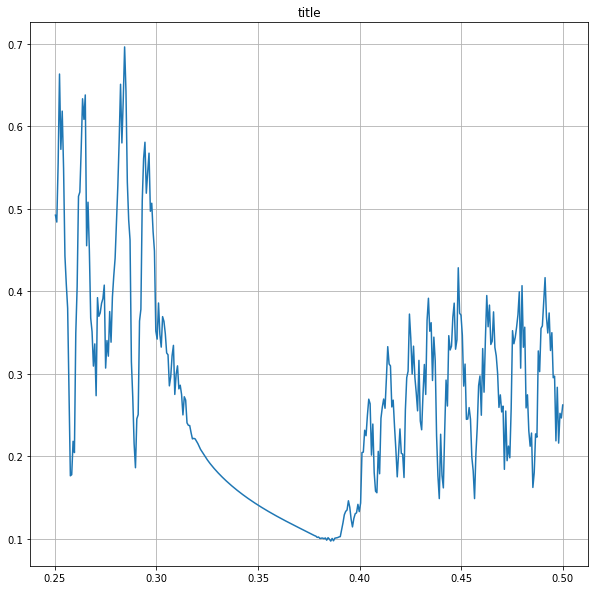

In [99]:
ds = 100
show_plot(img[ds])
fourier_line = fourier_transform_1d(img[ds])
l = fourier_line.shape[0]
# fourier_line = normilize(fourier_line)
x = np.linspace(0, 0.5, l)
mx = np.max(fourier_line[l//2:])
show_plot(normilize(fourier_line[l//2:]), x[l//2:])
# show_plot(fourier_line, x)

dt = 1
filter = Filter.bsf(0.3, 0.4, dt, 64)
show_plot(filter)
filter_f = fourier_transform_1d(filter,dt)
x = np.linspace(0, 0.5, len(filter_f))
show_plot(filter_f, x)

conv = convolution(img[ds], filter)
conv_f = fourier_transform_1d(conv)
l = conv_f.shape[0]
x = np.linspace(0, 0.5, l)
show_plot(conv)
show_plot(normilize(conv_f[l//2:], mx), x[l//2:])

In [18]:
new_lines=[]
dt = 1
filter = Filter.bsf(0.25, 0.35, dt, 64)
# print(lines.shape)
for i in range(img.shape[1]//2):
    # line_f = fourier_transform_1d(img[i])
    conv = convolution(img[i], filter)
    new_lines.append(conv)
    if i%100==0:
        print((i/(img.shape[1]//2))*100)


0.0
19.53125
39.0625
58.59375
78.125
97.65625


(512, 1024)


True

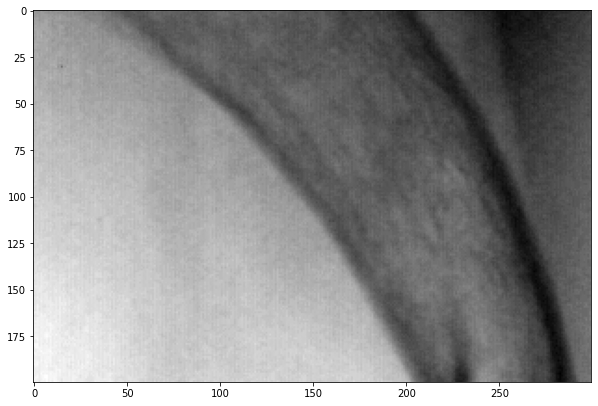

In [25]:
#
new_lines = np.array(new_lines)
print(new_lines.shape)
show_picture_plot(new_lines[300:500,600:900],'')
cv.imwrite(path+'3.jpg',new_lines[300:500,600:900])